# Гипотеза: о наличии связи между цветом и популярностью
Некоторые цвета смартфонов более популярны по сравнению с другими.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
data = pd.read_csv('smartphones.csv')
print(data.head())


                                     Smartphone     Brand           Model  \
0            Realme C55 8/256GB Sunshower Libre    Realme             C55   
1      Samsung Galaxy M23 5G 4/128GB Azul Libre   Samsung      Galaxy M23   
2  Motorola Moto G13 4/128GB Azul Lavanda Libre  Motorola        Moto G13   
3      Xiaomi Redmi Note 11S 6/128GB Gris Libre    Xiaomi  Redmi Note 11S   
4       Nothing Phone (2) 12/512GB Blanco Libre   Nothing       Phone (2)   

    RAM  Storage   Color Free  Final Price  
0   8.0    256.0  Yellow  Yes       231.60  
1   4.0    128.0    Blue  Yes       279.00  
2   4.0    128.0    Blue  Yes       179.01  
3   6.0    128.0    Gray  Yes       279.99  
4  12.0    512.0   White  Yes       799.00  


In [32]:
print(data.isnull().sum())


Smartphone       0
Brand            0
Model            0
RAM            483
Storage         25
Color            0
Free             0
Final Price      0
dtype: int64


In [33]:
data_cleaned = data.dropna().copy()


In [34]:

data_cleaned['Color'] = data_cleaned['Color'].astype('category').cat.codes
data_cleaned['Brand'] = data_cleaned['Brand'].astype('category').cat.codes
data_cleaned['Free'] = data_cleaned['Free'].astype('category').cat.codes
numeric_columns = data_cleaned.select_dtypes(include=['number'])


In [35]:
color_mapping = dict(enumerate(data['Color'].astype('category').cat.categories))
brand_mapping = dict(enumerate(data['Brand'].astype('category').cat.categories))
free_mapping = dict(enumerate(data['Free'].astype('category').cat.categories))

In [36]:
correlation_matrix = numeric_columns.corr()
print(correlation_matrix)

                Brand       RAM   Storage     Color      Free  Final Price
Brand        1.000000  0.028469  0.062282  0.129252 -0.028405     0.014316
RAM          0.028469  1.000000  0.787645  0.077129 -0.016812     0.690686
Storage      0.062282  0.787645  1.000000  0.071612  0.003161     0.636792
Color        0.129252  0.077129  0.071612  1.000000 -0.055904     0.078549
Free        -0.028405 -0.016812  0.003161 -0.055904  1.000000    -0.104898
Final Price  0.014316  0.690686  0.636792  0.078549 -0.104898     1.000000


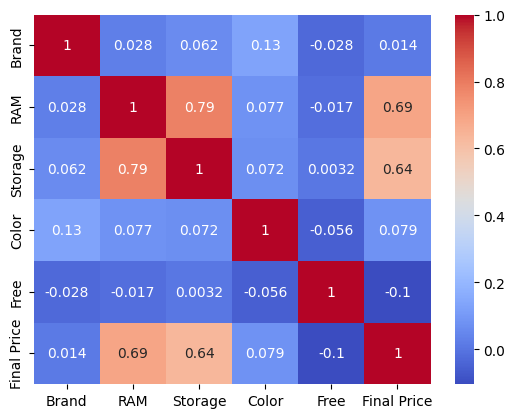

In [37]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

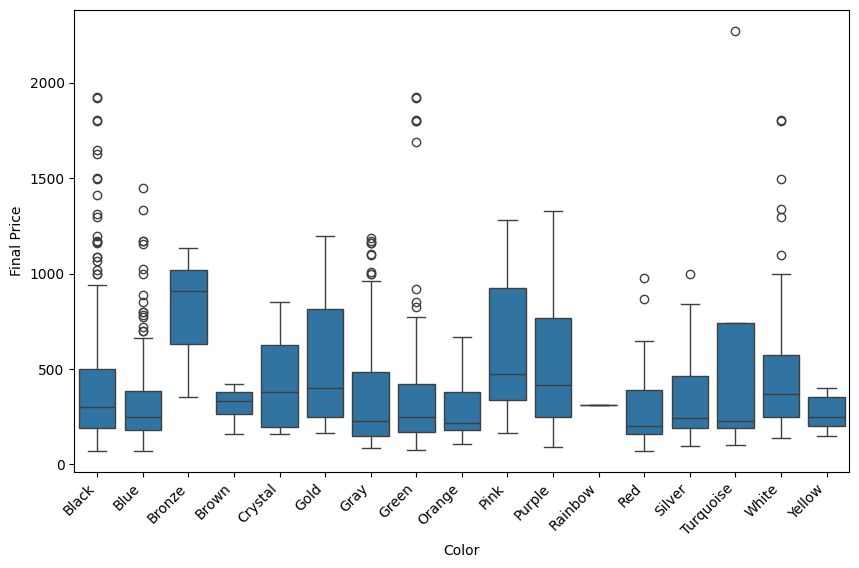

In [38]:
plt.figure(figsize=(10, 6))  
sns.boxplot(x='Color', y='Final Price', data=data_cleaned)
plt.xticks(ticks=range(len(color_mapping)), labels=color_mapping.values(), rotation=45, ha='right')
plt.xlabel('Color')
plt.show()



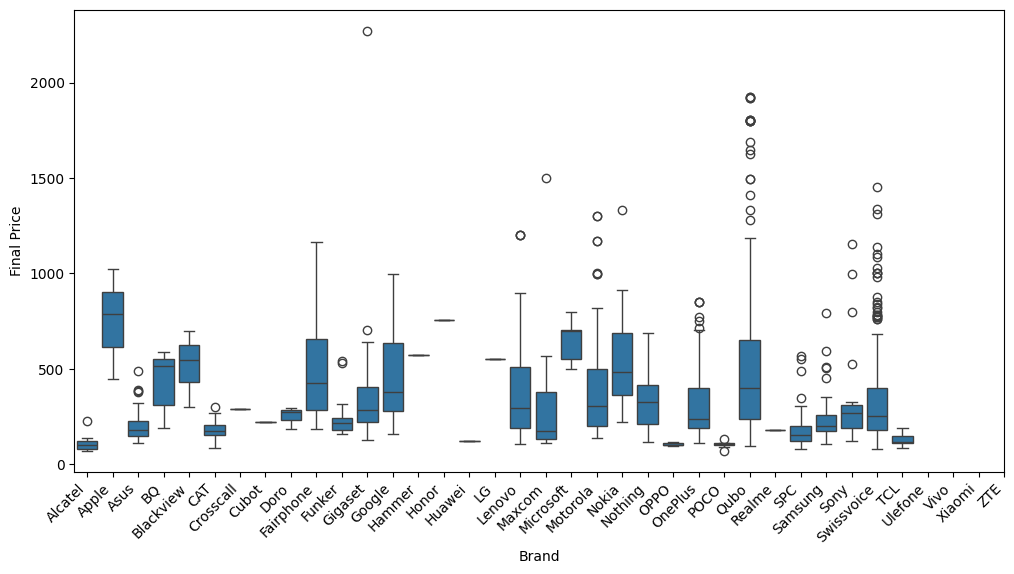

In [39]:
plt.figure(figsize=(12, 6))  
sns.boxplot(x='Brand', y='Final Price', data=data_cleaned)
plt.xticks(ticks=range(len(brand_mapping)), labels=brand_mapping.values(), rotation=45, ha='right')
plt.xlabel('Brand')
plt.show()


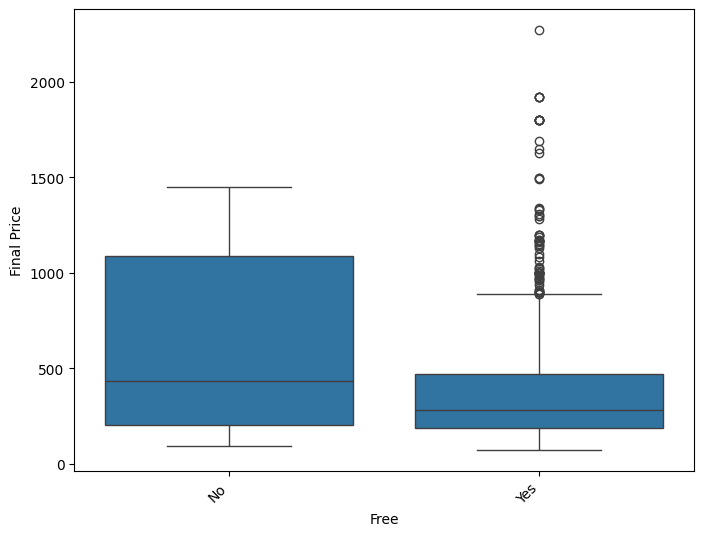

In [40]:
plt.figure(figsize=(8, 6))  
sns.boxplot(x='Free', y='Final Price', data=data_cleaned)
plt.xticks(ticks=range(len(free_mapping)), labels=free_mapping.values(), rotation=45, ha='right')
plt.xlabel('Free')
plt.show()

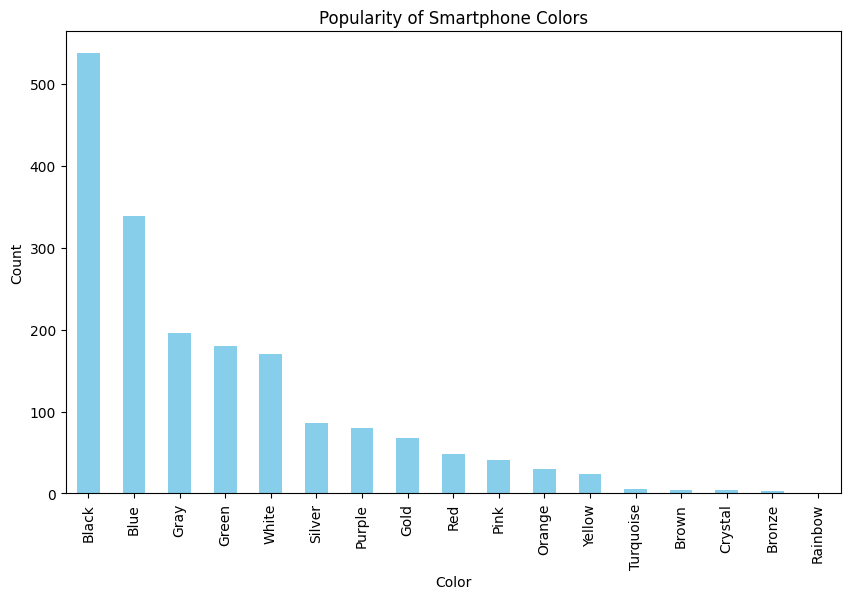

In [41]:
plt.figure(figsize=(10, 6))
data['Color'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Popularity of Smartphone Colors')
plt.xlabel('Color')
plt.ylabel('Count')
plt.show()


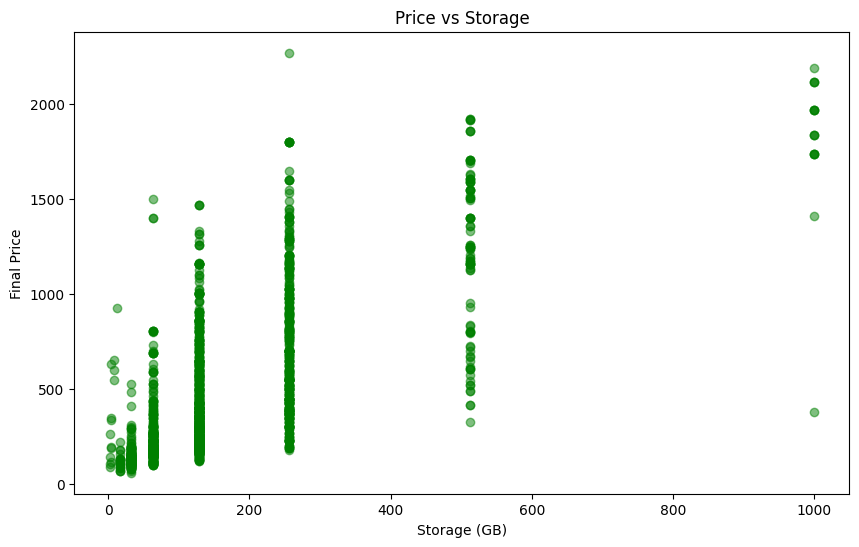

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Storage'], data['Final Price'], color='green', alpha=0.5)
plt.title('Price vs Storage')
plt.xlabel('Storage (GB)')
plt.ylabel('Final Price')
plt.show()

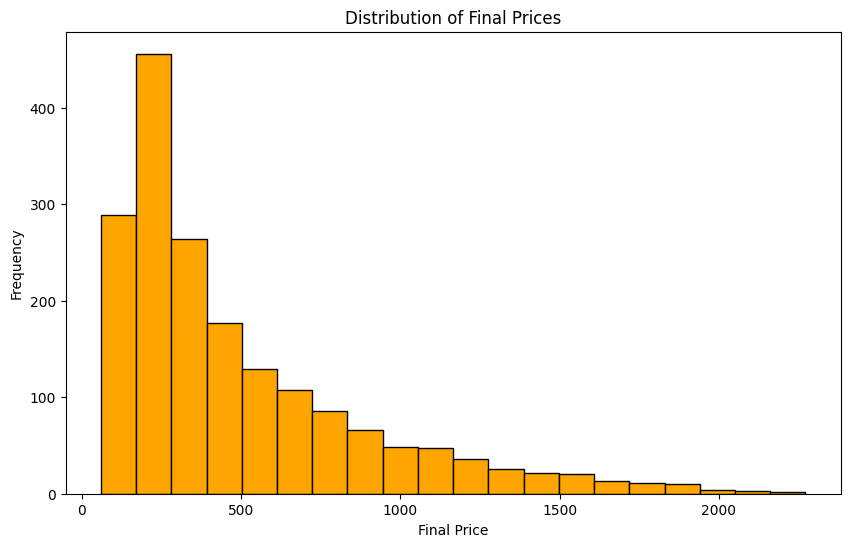

In [43]:
plt.figure(figsize=(10, 6))
plt.hist(data['Final Price'], bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Final Prices')
plt.xlabel('Final Price')
plt.ylabel('Frequency')
plt.show()

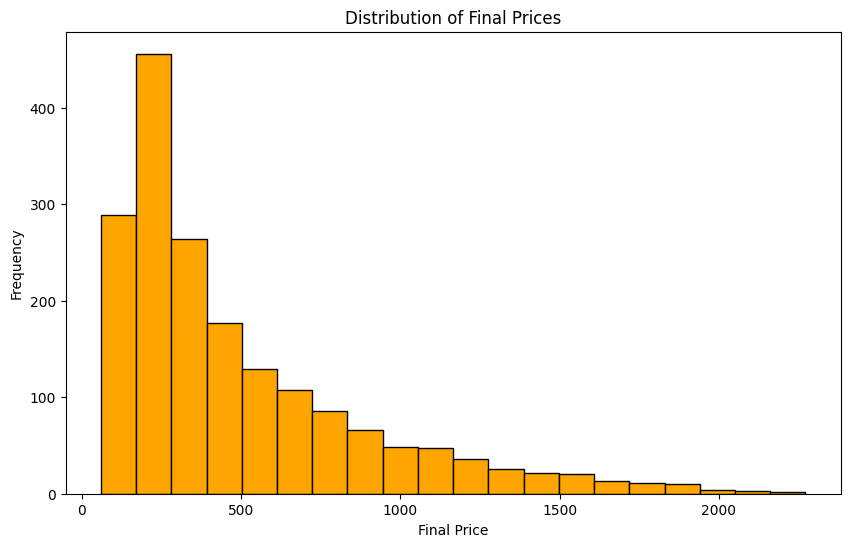

In [44]:
plt.figure(figsize=(10, 6))
plt.hist(data['Final Price'], bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Final Prices')
plt.xlabel('Final Price')
plt.ylabel('Frequency')
plt.show()

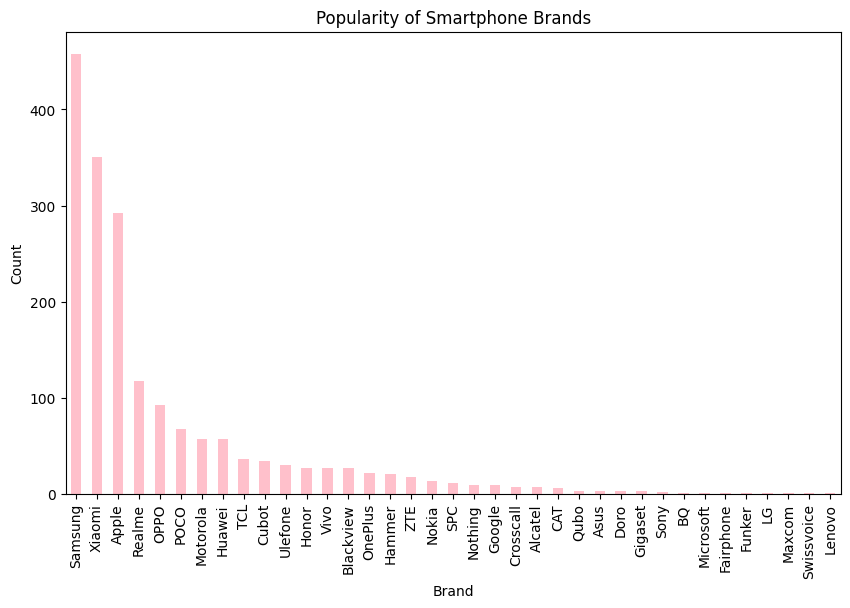

In [45]:
plt.figure(figsize=(10, 6))
data['Brand'].value_counts().plot(kind='bar', color='pink')
plt.title('Popularity of Smartphone Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

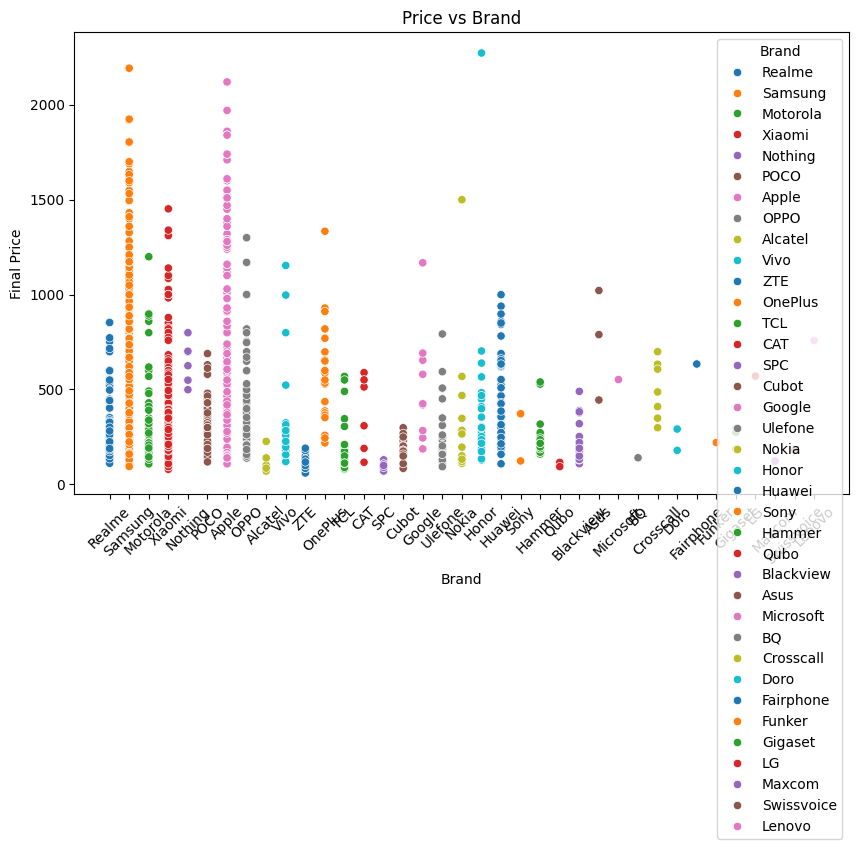

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Brand', y='Final Price', data=data, hue='Brand', palette='tab10')
plt.title('Price vs Brand')
plt.xlabel('Brand')
plt.ylabel('Final Price')
plt.xticks(rotation=45)
plt.show()

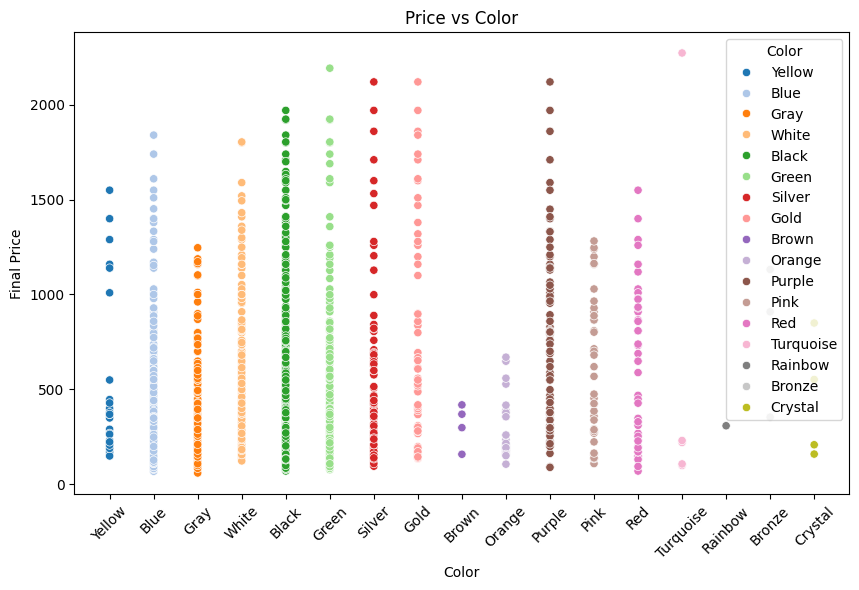

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Color', y='Final Price', data=data, hue='Color', palette='tab20')
plt.title('Price vs Color')
plt.xlabel('Color')
plt.ylabel('Final Price')
plt.xticks(rotation=45)
plt.show()

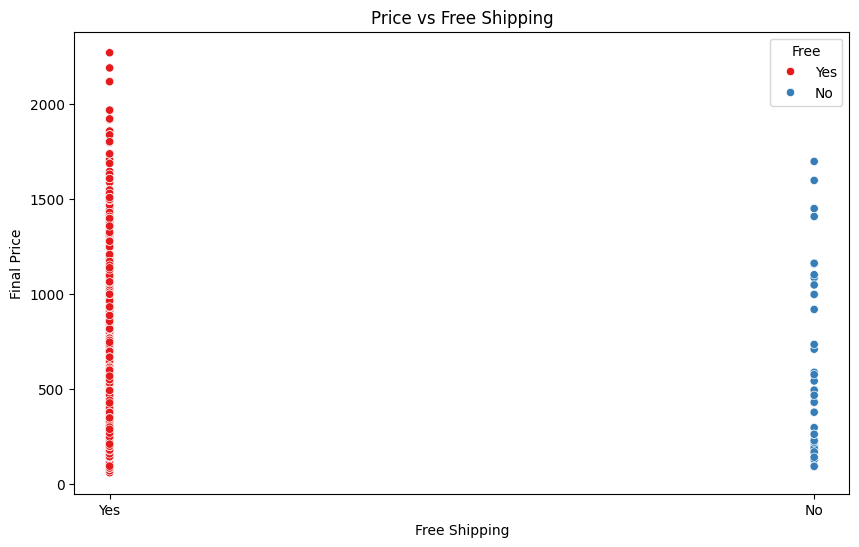

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Free', y='Final Price', data=data, hue='Free', palette='Set1')
plt.title('Price vs Free Shipping')
plt.xlabel('Free Shipping')
plt.ylabel('Final Price')
plt.show()

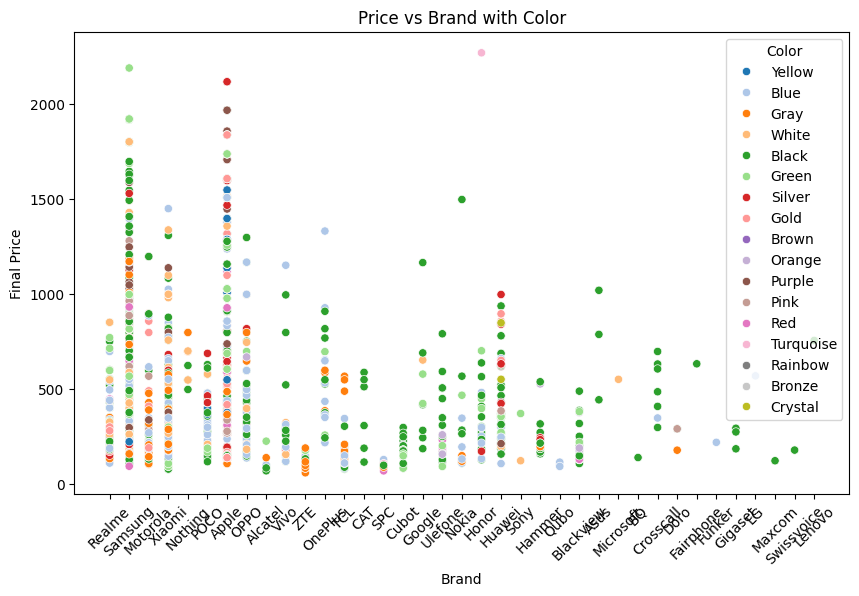

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Brand', y='Final Price', data=data, hue='Color', palette='tab20')
plt.title('Price vs Brand with Color')
plt.xlabel('Brand')
plt.ylabel('Final Price')
plt.xticks(rotation=45)
plt.show()

In [52]:
data.set_index(['Brand', 'Model'], inplace=True)
print(data.head())

                                                           Smartphone   RAM  \
Brand    Model                                                                
Realme   C55                       Realme C55 8/256GB Sunshower Libre   8.0   
Samsung  Galaxy M23          Samsung Galaxy M23 5G 4/128GB Azul Libre   4.0   
Motorola Moto G13        Motorola Moto G13 4/128GB Azul Lavanda Libre   4.0   
Xiaomi   Redmi Note 11S      Xiaomi Redmi Note 11S 6/128GB Gris Libre   6.0   
Nothing  Phone (2)            Nothing Phone (2) 12/512GB Blanco Libre  12.0   

                         Storage   Color Free  Final Price  
Brand    Model                                              
Realme   C55               256.0  Yellow  Yes       231.60  
Samsung  Galaxy M23        128.0    Blue  Yes       279.00  
Motorola Moto G13          128.0    Blue  Yes       179.01  
Xiaomi   Redmi Note 11S    128.0    Gray  Yes       279.99  
Nothing  Phone (2)         512.0   White  Yes       799.00  


## Результат:
В ходе анализа данных была найдена кореляция между ОЗУ(RAM) и количеством встроенной памяти(Storage), а Корреляция между цветом смартфона и его ценой незначительна.

Так-же на графиках видно, что:
Цена значительно варьируется в зависимости от цвета смартфона (стандартное отклонение: 319.63).
Цена значительно варьируется в зависимости от бренда смартфона (стандартное отклонение: 179.04).
Цена значительно варьируется в зависимости от статуса блокировки оператором (стандартное отклонение: 364.72).